# Example of dynamic characterization

In this example, there is a very simple database containing only one node with a pulse emission of CH4 without any extra temporal distributions.

In [1]:
from example_databases import *
db_dynamic_cf_test()

100%|██████████| 3/3 [00:00<00:00, 56679.78it/s]


Vacuuming database 
Not able to determine geocollections for all datasets. This database is not ready for regionalization.


100%|██████████| 1/1 [00:00<00:00, 23831.27it/s]

Vacuuming database 


In [2]:
demand = {('test', 'A'): 1}
gwp = ('GWP', 'example')

In [3]:
from timex_lca import TimexLCA

In [4]:
mlca = TimexLCA(demand, gwp)

Calculation count: 0


/Users/timodiepers/Documents/Coding/timex/timex_lca/timex_lca.py:75: UserWarning: No database_date_dict provided. Treating the databases containing the functional unit as dynamic. No remapping to time explicit databases will be done.
  warnings.warn(
/Users/timodiepers/Documents/Coding/timex/timex_lca/timex_lca.py:86: UserWarning: No edge filter function provided. Skipping all edges within background databases.
  warnings.warn(


In [5]:
mlca.build_timeline()

,date_producer,producer_name,date_consumer,consumer_name,amount,interpolation_weights
0,2024-01-01,A,2024-01-01,-1,1.0,None


In [6]:
mlca.lci()

In [7]:
mlca.static_lcia()
mlca.static_score

28.40999984741211

`timex` allows to calculate radiative forcing [W/m2] and GWP [kg CO2eq] over fexible time horizons (TH). Default TH is 100 years.

The TH of analysis can be flexible (fixed_TH == False), which calculates the warming for the duration of TH from the timing each each emission or it can be fixed (fixed_TH), which harmonizes the duration of impact calculation to duration of TH starting from the functional unit. This means that emissions occuring later than the functional unit are counted for a shorter time (less impact) and emission occuring earlier are counted for a longer time (more impact). See more information in Levasseur 2010.

Calculate dynamic emissions for radiative forcing, flexible TH and 100 years TH (default)

In [8]:
mlca.dynamic_lcia(metric="radiative_forcing", fixed_TH = False)

/Users/timodiepers/Documents/Coding/timex/timex_lca/dynamic_characterization.py:55: UserWarning: No dynamic characterization functions provided. Using default functions for CO2, CH4, N2O, CO.
  warnings.warn(


,date,amount,flow,flow_name,activity,activity_name,amount_sum
0,2024-01-01 00:00:00,0.000000e+00,2,methane,4,"(test, A)",0.000000e+00
1,2024-12-31 05:49:12,1.922234e-13,2,methane,4,"(test, A)",1.922234e-13
2,2025-12-31 11:38:24,1.766044e-13,2,methane,4,"(test, A)",3.688278e-13
3,2026-12-31 17:27:36,1.622546e-13,2,methane,4,"(test, A)",5.310824e-13
4,2027-12-31 23:16:48,1.490707e-13,2,methane,4,"(test, A)",6.801531e-13
...,...,...,...,...,...,...,...
95,2119-01-01 00:54:00,6.670712e-17,2,methane,4,"(test, A)",2.364951e-12
96,2120-01-01 06:43:12,6.128689e-17,2,methane,4,"(test, A)",2.365012e-12
97,2120-12-31 12:32:24,5.630707e-17,2,methane,4,"(test, A)",2.365068e-12
98,2121-12-31 18:21:36,5.173189e-17,2,methane,4,"(test, A)",2.365120e-12


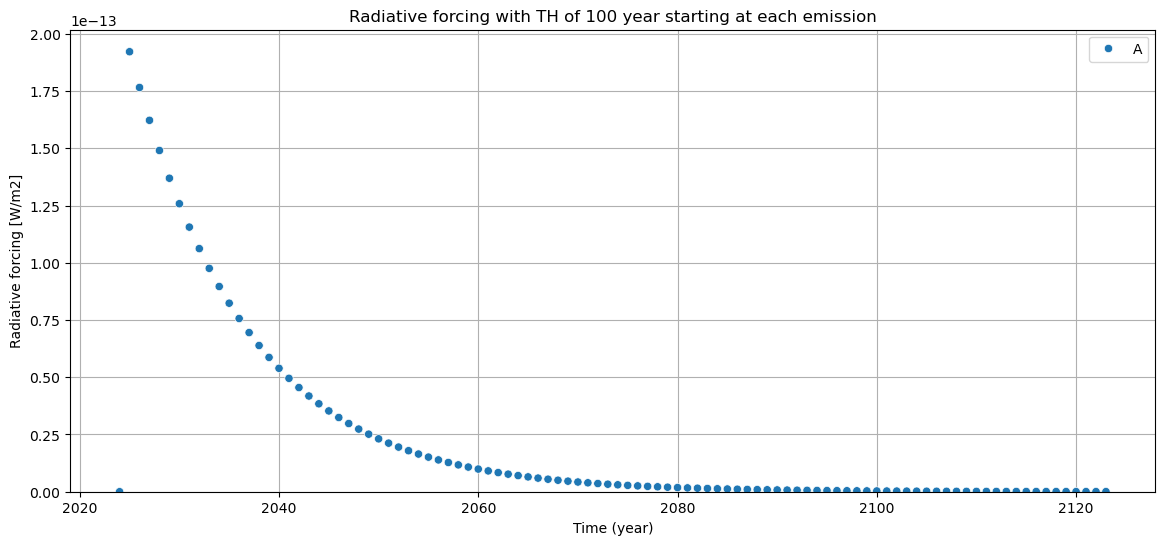

In [9]:
mlca.plot_dynamic_characterized_inventory()


In [10]:
print(f"characterized dynamic score: {mlca.dynamic_score} [{mlca.type_of_method} ({mlca.TH} {mlca.temporal_grouping})]")

characterized dynamic score: 2.365167366927053e-12 [radiative_forcing (100 year)]


We can also calculate dynamic emissions for GWP, flexible TH and 100 years TH (default)

/Users/timodiepers/Documents/Coding/timex/timex_lca/dynamic_characterization.py:55: UserWarning: No dynamic characterization functions provided. Using default functions for CO2, CH4, N2O, CO.
  warnings.warn(
/Users/timodiepers/Documents/Coding/timex/timex_lca/dynamic_characterization.py:182: UserWarning: Using timex' default co2 characterization function for GWP reference.
  warnings.warn(


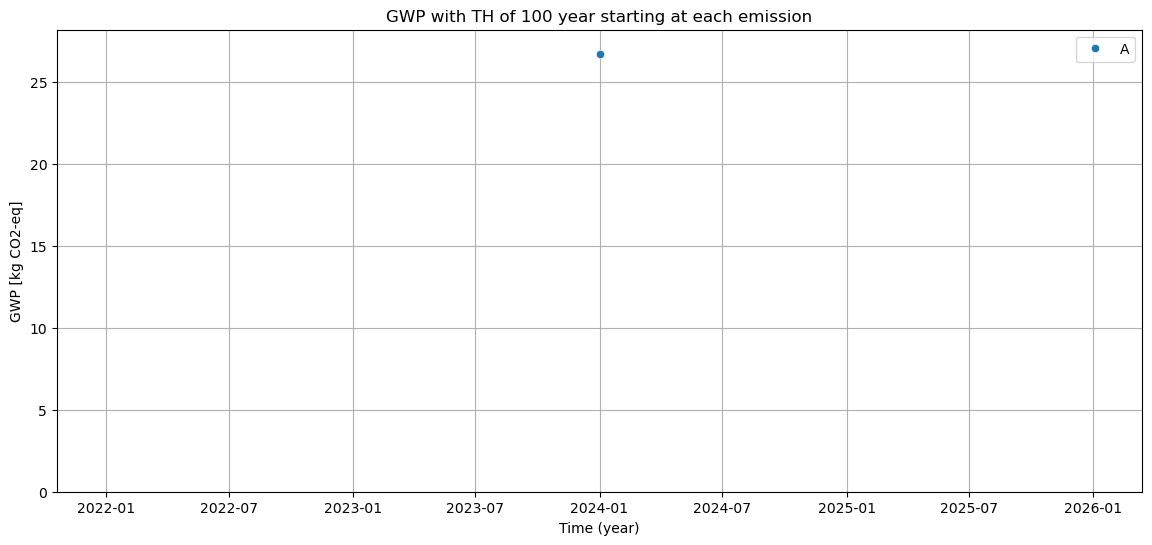

characterized dynamic score: 26.705808501447027 [GWP (100)]


In [11]:
mlca.dynamic_lcia(metric="GWP", fixed_TH = False, TH=100)
mlca.plot_dynamic_characterized_inventory()
print(f"characterized dynamic score: {mlca.dynamic_score} [{mlca.type_of_method} ({mlca.TH})]")

In [12]:
mlca.dynamic_score

26.705808501447027

In [14]:
mlca.static_score

28.40999984741211